# **Capstone project: Providing data-driven suggestions for HR**

## Description

This project comes from the last capstone course of the Google Advanced Data Analytics Professional Certificate on Coursera.

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## 1. Data Exploration (Initial EDA and data cleaning)

- Understand variables
- Clean dataset (missing data, redundant data, outliers)
- Visualizations


In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns, standardize the column names so that they are all in snake_case, correct misspellings
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check for missing values

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data.

### Check for duplicates

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


About 20% of the data are duplicates. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. We proceed by dropping them.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

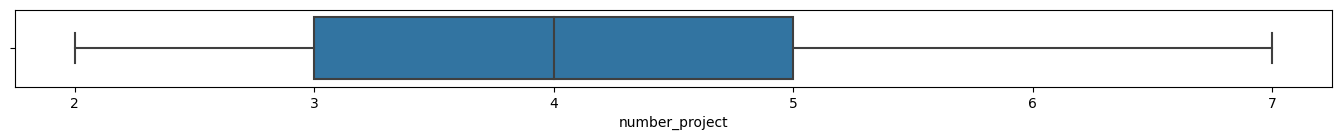

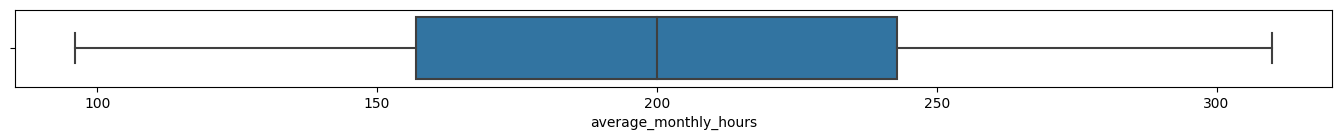

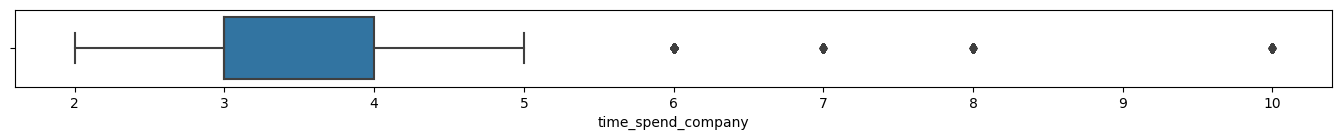

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
cols = ['number_project', 'average_monthly_hours', 'time_spend_company']
for col in cols:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df1, x=col)

We see outliers in the column 'time_spend_company'. Let's check how many there are.

In [12]:
# Determine the number of rows containing outliers
# Compute the 25th percentile value in 'time_spend_company'
percentile25 = df1['time_spend_company'].quantile(0.25)

# Compute the 75th percentile value in 'time_spend_company'
percentile75 = df1['time_spend_company'].quantile(0.75)

# Compute the interquartile range in 'time_spend_company'
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in 'time_spend_company'
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(f"Lower limit: {lower_limit}")
print(f"Upper limit: {upper_limit}")

# Identify subset of data containing outliers in 'time_spend_company'
outliers = df1[(df1['time_spend_company'] > upper_limit) | (df1['time_spend_company'] < lower_limit)]

# Count how many rows in the data contain outliers in 'time_spend_company'
print(f"Number of rows in the data containing outliers in 'time_spend_company': {len(outliers)}")

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in 'time_spend_company': 824


### Data visualizations

Let's plot histograms, grouped by the column 'left', to see the contribution.

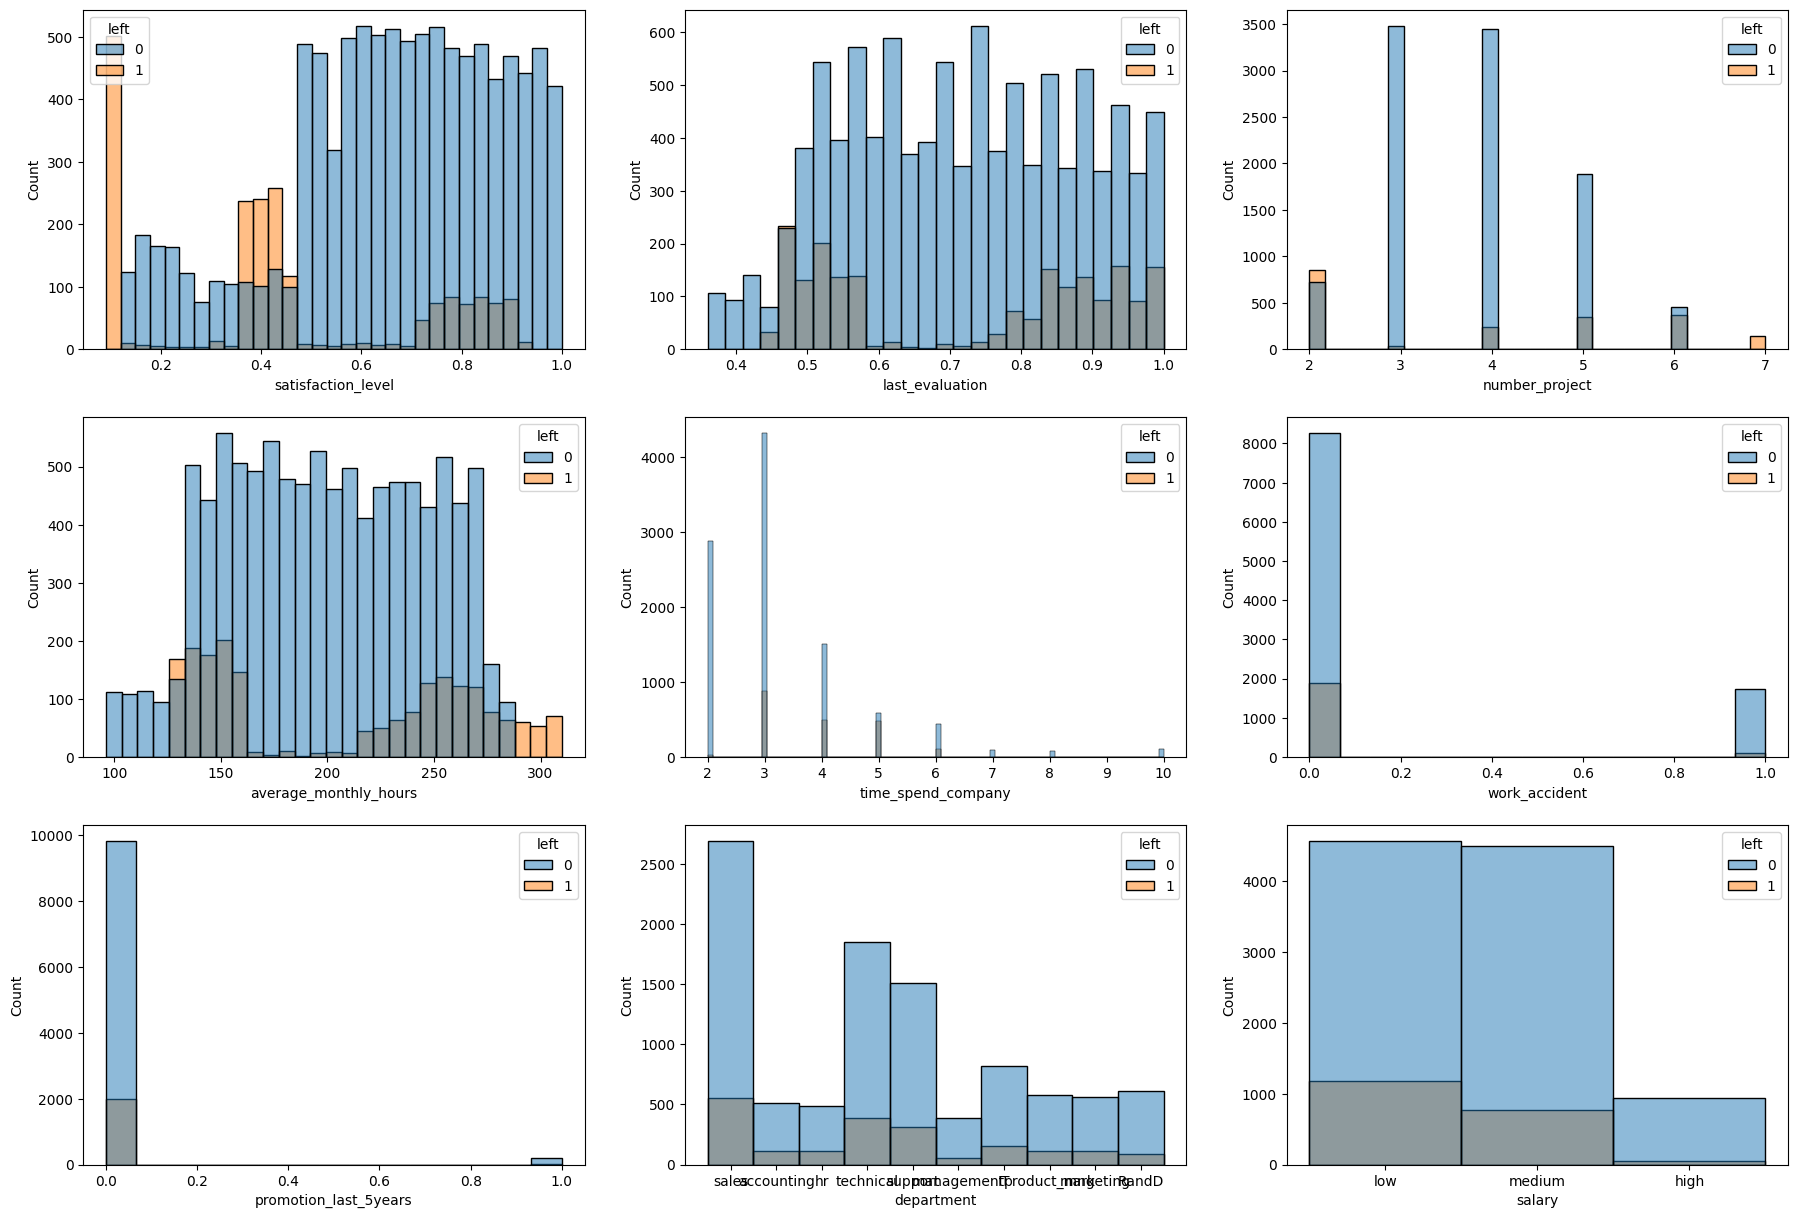

In [13]:
# plot histograms showing contributions grouped by 'left'
# Set figure and axes
fig, axes = plt.subplots(3, 3, figsize = (22,15))

for i, ax in enumerate(axes.flat):
    sns.histplot(data=df1, x=df1.drop('left', axis=1).columns[i], hue='left', ax=ax)

- We see that many people with a low satisfaction level (<0.5) left, but also alot of people with a relatively high satisfaction level (0.7-0.9) left.
- Similarly same observation applies to last evaluation scores and average monthly hours.
- People with two projects and people with 6+ projects per month have a high percentage of leavers.
- Work accidents and the department seems to have little impact on the number of leavers.
- We have very few new people leaving. The longest-tenured employees didn't leave (7+ years).
- We have almost no people leaving when they got a promotion in the last 5 years and/or have a high salary.

Let's check their satisfaction level based on different features like last evaluation, number of projects, monthly hours, and time spend in the company and salary.

<Axes: xlabel='last_evaluation', ylabel='satisfaction_level'>

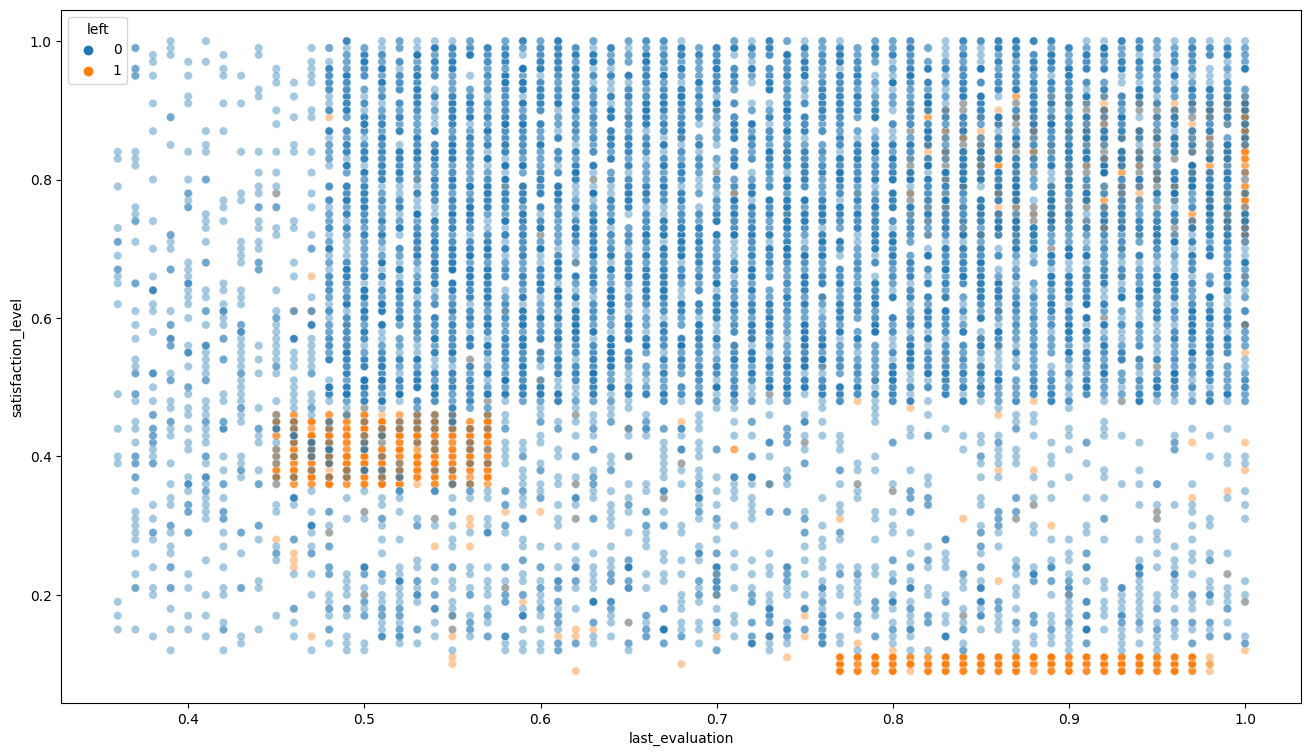

In [14]:
# satisfaction level based on last evaluation
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='last_evaluation', y='satisfaction_level', hue='left', alpha=0.4)

There is a surprising high number of people with a good evaluation score who left. The score can't be the reason for that. To achieve such a good score they might be working long hours. Let's check if we can confirm our assumption.

<Axes: xlabel='average_monthly_hours', ylabel='last_evaluation'>

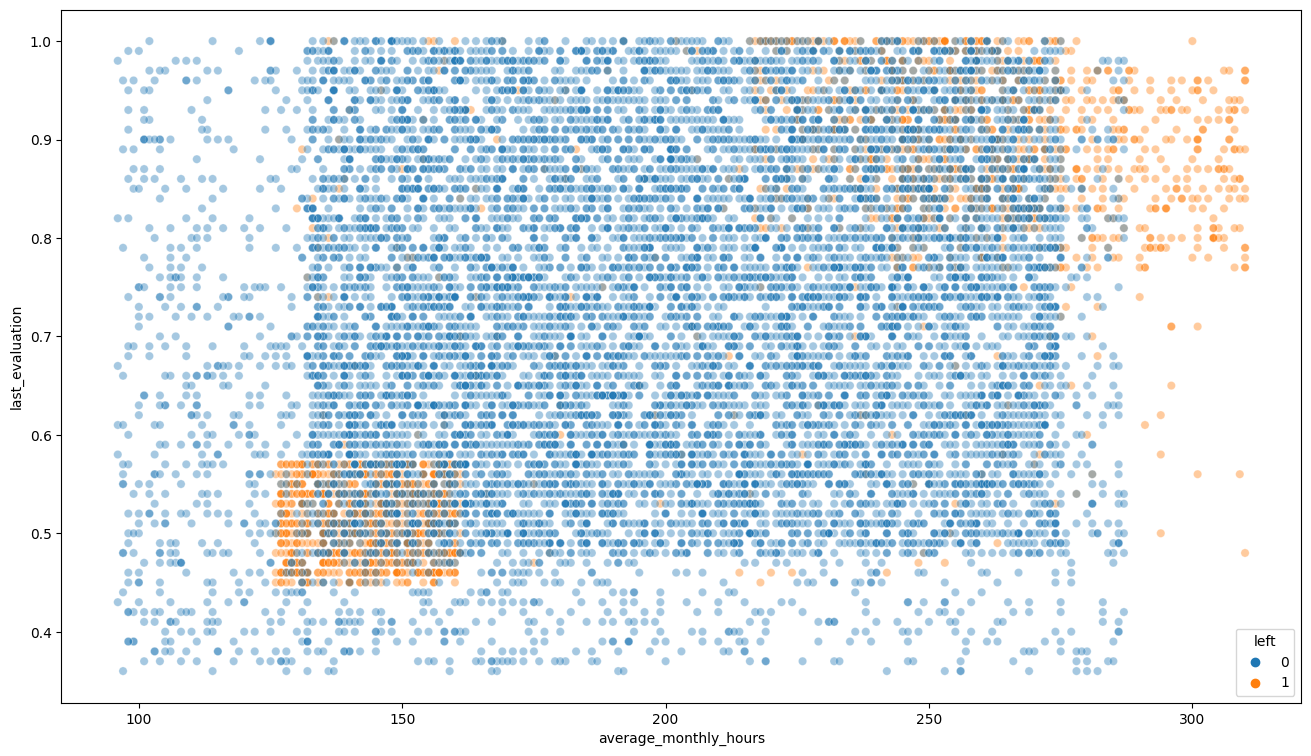

In [15]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)

It indeed seems like the people who left with high evaluation scores are those who worked around 210-310 hours/week. Let's check the satisfaction level.

mean average monthly hours: 200.4735218080227
normal average monthly hours: 173.33333333333331


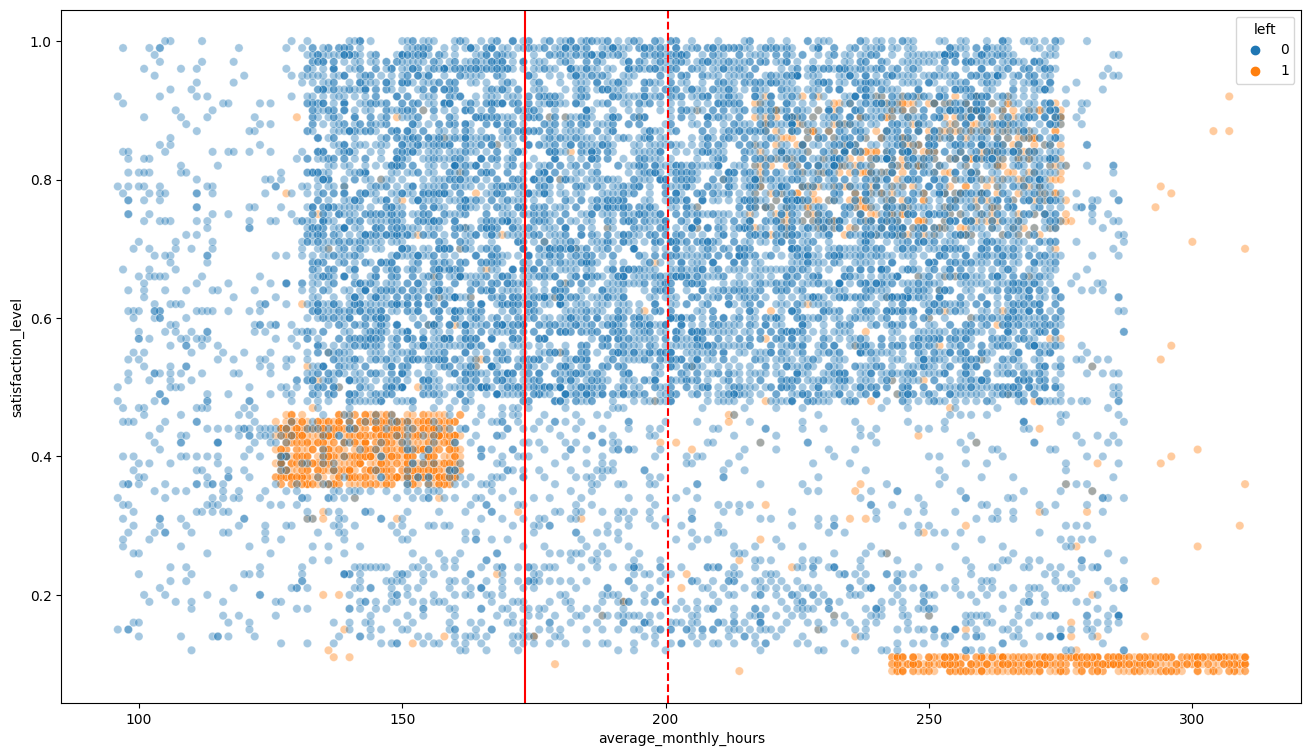

In [16]:
# last evaluation based on average_monthly_hours

# mean average monthly hours in this company
mean_amh = df1['average_monthly_hours'].mean()
print(f"mean average monthly hours: {mean_amh}")

# mean average monthly hours based on 40h/week
mean_normal = 52/12*40
print(f"normal average monthly hours: {mean_normal}")

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=mean_normal, color='red', ls='-')
plt.axvline(x=mean_amh, color='red', ls='--')

- We can identify three main groups of leaving people:
    1. People with long working hours of 240-310 hours/week who have a very low satisfaction level of about 0.1
    2. People with long working hours of 210-270 hours/week who have a relatively high satisfaction level of 0.7-0.9.
    3. People with 'more normal'/lower working hours of 120-160 hours/week who have a low satisfaction level of 0.35-0.45.
- The average monthly hours for this company is 200 hours/week, significantly higher than normal working hours of 173 hours/week.
- Group 1. and 2. might have left because of high working hours.

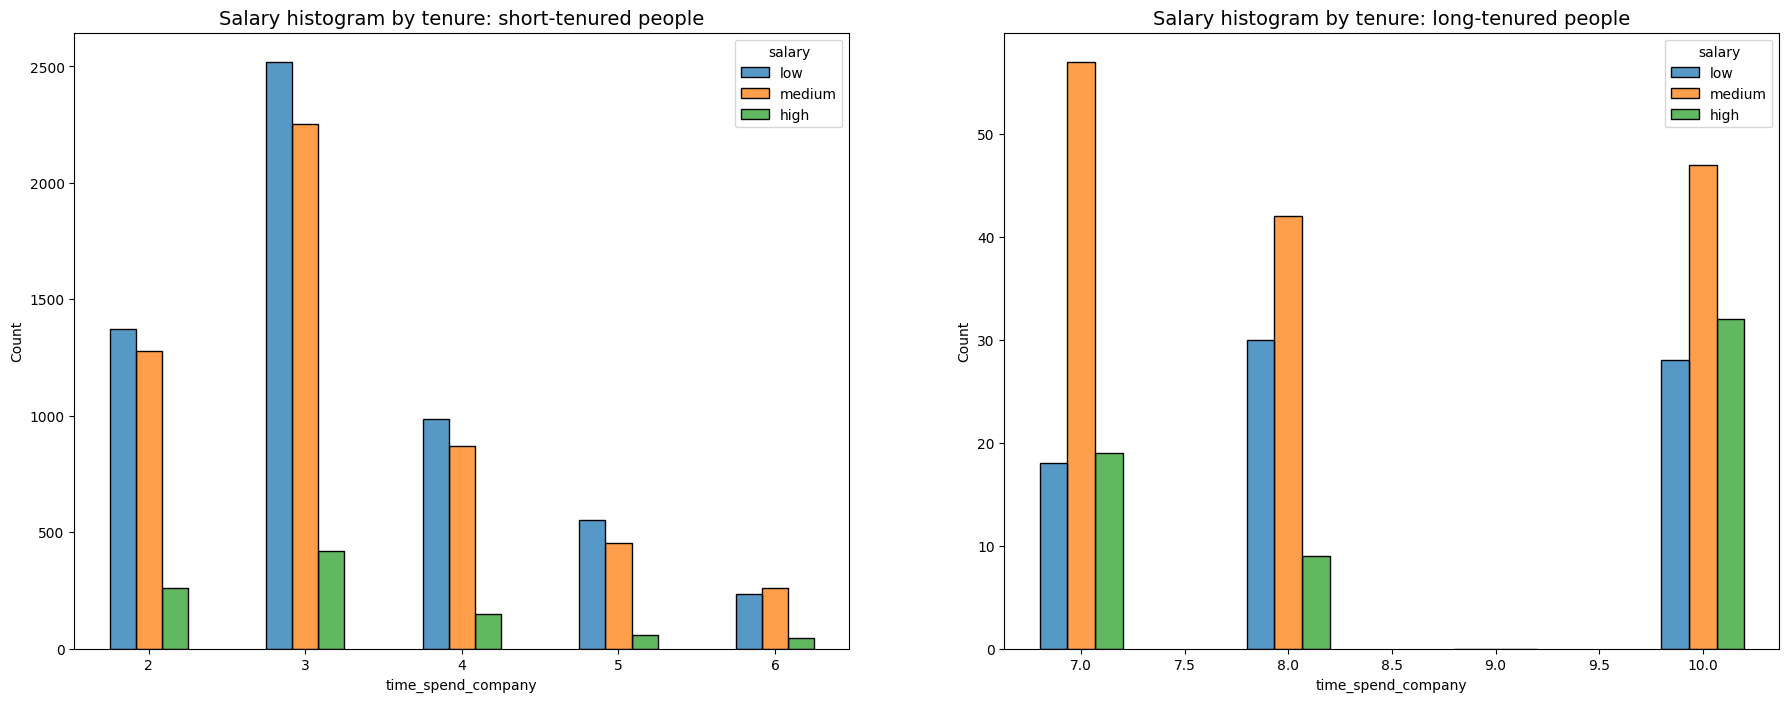

In [17]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['time_spend_company'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['time_spend_company'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='time_spend_company', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='time_spend_company', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

## 3. Model building

The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable 'left' can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). We will build a random forest machine learning model with sklearn.

In [18]:
# Encode categorical variables
df2 = pd.get_dummies(df1)

In [19]:
# Isolate the outcome variable
y = df2['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [20]:
# Select the features
X = df2.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False


In [21]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create train & validate data (we get a 60/20/20 split for train/val/test)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

# Create a list where train data indices are -1 and validation data indices are 0
split_index = [0 if x in X_val.index else -1 for x in X_train.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(split_index)

In [22]:
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=pds, refit='roc_auc')

In [23]:
%%time

# fit the model
rf1.fit(X_train, y_train)

CPU times: total: 5min 37s
Wall time: 5min 44s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0, -1])),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'precision', 'accuracy', 'f1', 'recall'})

In [24]:
# Check best AUC score on CV
rf1.best_score_

0.9890672110552764

In [25]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

Next, write a function that will help to extract all the scores from the grid search. 

In [26]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.concat([table, pd.DataFrame([{'Model': model_name,
                      'AUC': auc,
                      'Precision': precision,
                      'Recall': recall,
                      'F1': f1,
                      'Accuracy': accuracy,
                     }])],
                     ignore_index=True
                    )
  
    return table

In [27]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
rf1_cv_results

,Model,AUC,Precision,Recall,F1,Accuracy
0,random forest cv,0.989067,0.948586,0.927136,0.937738,0.979566


All of these scores from the random forest model are strong indicators of good model performance.
Next, evaluate these models on the test set.

Define a function that gets all the scores from a model's predictions.

In [28]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = round(roc_auc_score(y_test_data, preds), 3)
    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name],
                        'AUC': [auc],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
    return table

Apply the function defined above to get scores for the random forest model. 

In [29]:
# Get the results on validation set for model
rf1_val_results = get_scores('random forest1 val', rf1, X_test, y_test)
rf1_val_results

,model,AUC,precision,recall,f1,accuracy
0,random forest1 val,0.957,0.946,0.925,0.935,0.979


The test scores are very similar to the validation scores, which is good. This appears to be a strong model.
Plot a confusion matrix to visualize how well it predicts on the test set.

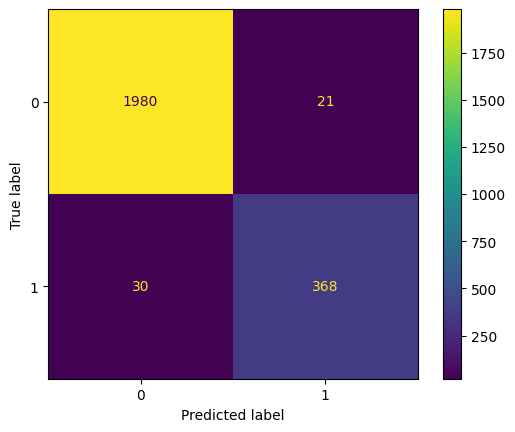

In [30]:
# Generate array of values for confusion matrix
preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_)
disp.plot();

#### Random forest feature importance

We plot the feature importances for the random forest model.

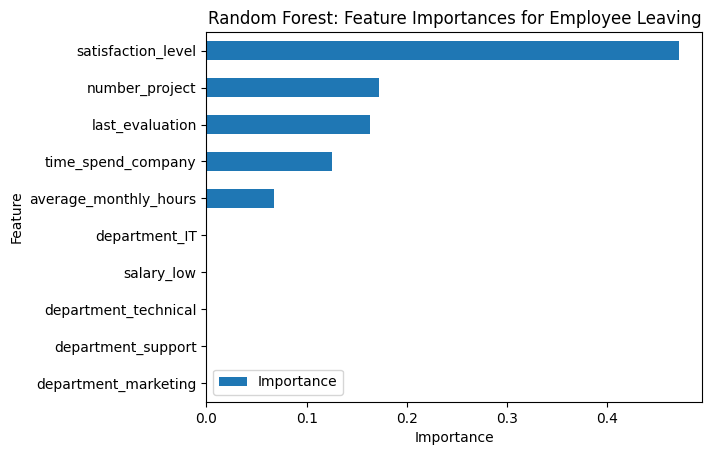

In [31]:
# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter 'feat_impt' to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, 'satisfaction_level', 'number_project', 'last_evaluation', 'time_spend_company' and 'average_monthly_hours' have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, 'left'.